# Part 1:

In [1]:
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt

In [2]:
data = 'hygdata_v3.csv'
ID = np.genfromtxt(data, usecols=0, unpack=True, delimiter=',',dtype=int,skip_header=1)
RA, dec, lumen, dist = np.genfromtxt(data, usecols=(23,24,33,9), unpack=True, delimiter=',',skip_header=1)
Spect = np.genfromtxt(data, usecols=15, unpack=True, delimiter=',',dtype='<U1',skip_header=1) #1 byte Strings because subclasses aren't relevant here

In [3]:
# RA ranges from 0 to 2pi, mollweide projection requires RA be in (-pi,pi)
RA[np.where(RA>=np.pi)]=RA[np.where(RA>=np.pi)]-2*np.pi #make all RA in (pi,2pi) to (-pi,0)
#RA = RA - np.pi does the job too, but shifts origin by pi

flux = lumen/(4*np.pi*dist**2) # incident flux = Total Luminosity/Total Surface Area (for sphere 'dist' away)

In [136]:
def formatter(ax):
    ax.set_facecolor('black')
    ax.set_ylabel('Declination Values',fontsize='15',fontweight='roman')
    ax.set_xticklabels([]) #X labels are formed on the image, so no.
    
def spectro(starclass):
    ind = np.where(Spect==starclass)
    nRA = RA[ind]
    ndec = dec[ind]
    nflux = flux[ind]
    return nRA, ndec, nflux

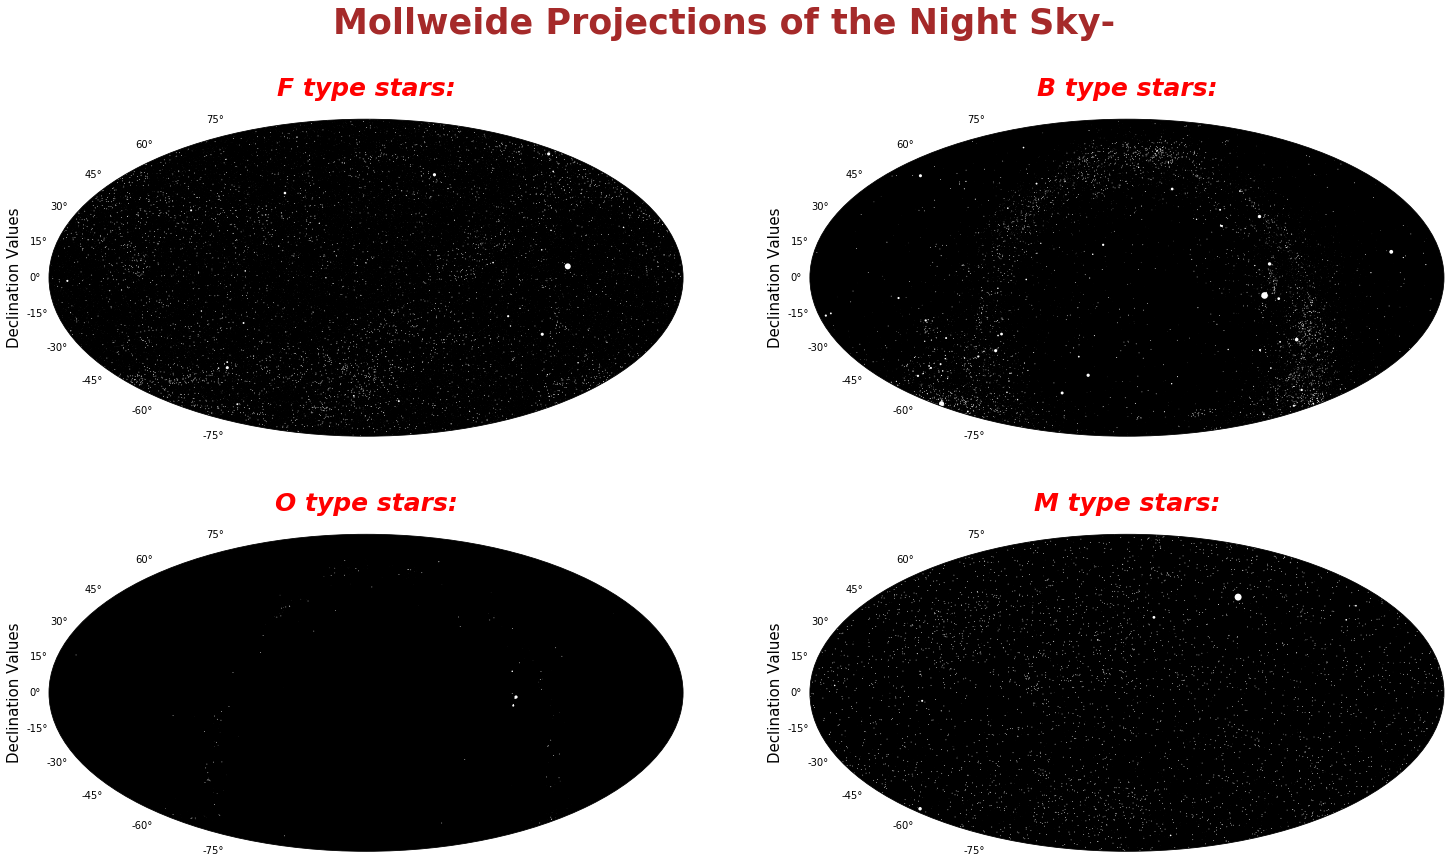

In [137]:
fig = plt.figure(figsize=(25, 14))

def plotter(ax,starclass):
    formatter(ax)
    ax_RA,ax_dec,ax_flux = spectro(starclass)
    ax.set_title(f'{starclass} type stars:',fontweight='semibold',fontsize=25,pad=23,fontstyle='italic',color='red')
    ax.scatter(ax_RA,ax_dec,s=750*ax_flux,color='white',marker='o',edgecolors='none') #Proportionality Constant = 750

    
fig.text(0.5, 0.96, 'Mollweide Projections of the Night Sky-', ha='center', va='center',fontweight='heavy',fontsize=35,color='brown')

    
F = plt.subplot(221, projection="mollweide")
plotter(F,'F')
    

B = plt.subplot(222, projection="mollweide")
plotter(B,'B')


O = plt.subplot(223, projection="mollweide")
plotter(O,'O')


M = plt.subplot(224, projection="mollweide")
plotter(M,'M')

#fig.savefig('Part 1.png', dpi=1000, facecolor='white',edgecolor='black')
plt.show()

In [6]:
#Check whether O type stars are less abundant or less brightly seen-
print('Number of O type stars:',len(np.where(Spect=='O')[0]))
print('Max brightness for O:',flux[np.where(Spect=='O')].max())
#print('Min distance for O:',dist[np.where(Spect=='O')].min())

print('\nNumber of F type stars:',len(np.where(Spect=='F')[0]))
print('Max brightness for F:',flux[np.where(Spect=='F')].max())
#Both ^_^

Number of O type stars: 264
Max brightness for O: 0.013957181317601063

Number of F type stars: 25602
Max brightness for F: 0.12271434364869772


# Part 2: Same Variables, Restart Kernel to be safe.

In [1]:
import numpy as np
from matplotlib import pylab
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [2]:
page = requests.get('http://astrosat.iucaa.in/czti/?q=grb')
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find_all('table')[0]
table_rows = table.find_all('tr')

GMB_ra = []
GMB_dec = []

for i in range(1,len(table_rows)):
    elements = table_rows[i].get_text().replace(',',' ').split()
    try:
        GMB_ra.append(float(elements[3]))
        GMB_dec.append(float(elements[4]))
    except: #To eliminate all non-numerical cases
        continue
GMB_ra = np.radians(GMB_ra)
GMB_dec = np.radians(GMB_dec)
GMB_ra[np.where(GMB_ra>np.pi)]=GMB_ra[np.where(GMB_ra>np.pi)]-2*np.pi #Satisfy projection range 

In [3]:
data = 'hygdata_v3.csv'
ID = np.genfromtxt(data, usecols=0, unpack=True, delimiter=',',dtype=int,skip_header=1)
RA, dec, lumen, dist = np.genfromtxt(data, usecols=(23,24,33,9), unpack=True, delimiter=',',skip_header=1)
Spect = np.genfromtxt(data, usecols=15, unpack=True, delimiter=',',dtype='<U1',skip_header=1) #1 byte Strings because subclasses aren't relevant here

In [5]:
# RA ranges from 0 to 2pi, mollweide projection requires RA be in (-pi,pi)
RA[np.where(RA>=np.pi)]=RA[np.where(RA>=np.pi)]-2*np.pi
#RA = RA - np.pi does the job too

In [12]:
vatr = np.genfromtxt(data, usecols=36, unpack=True, delimiter=',',skip_header=1,dtype=str)
isVariable = vatr!=''

flux = lumen/(4*np.pi*dist**2) # incident flux = Total Luminosity/Total Surface Area (for sphere 'dist' away)

GMB_flux = np.median(flux[isVariable])*75
flux[isVariable]=GMB_flux #flux will be the marker size, so make all variable star marker sizes same as GMB markers

col = np.full(len(ID),'white',dtype=object)
col[isVariable]='yellow' #All stars will be plotted yellow if variable, else white

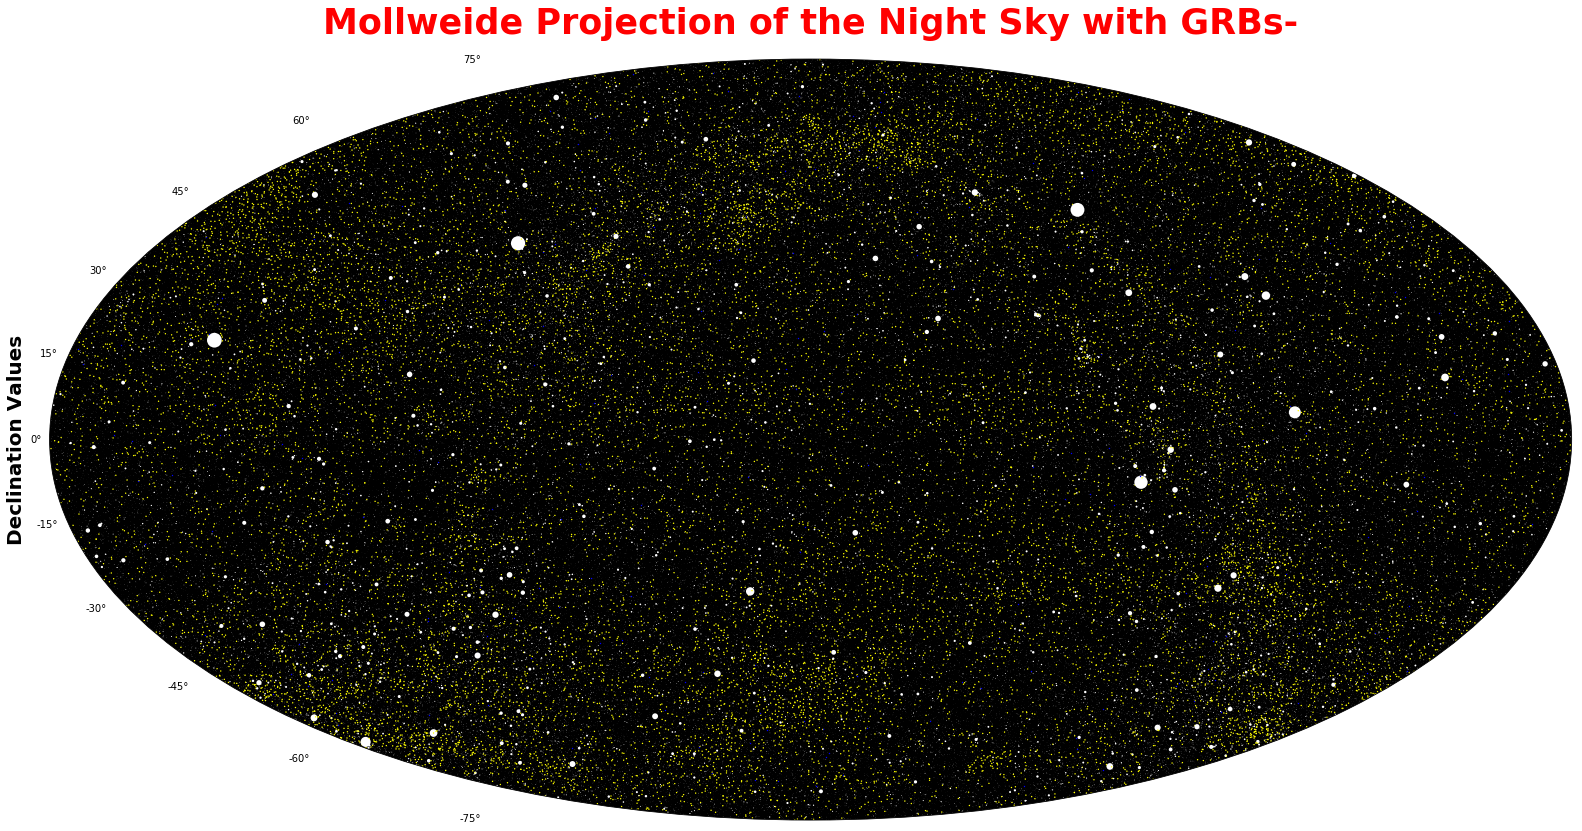

In [14]:
fig = plt.figure(figsize=(28, 14))

ax = fig.add_subplot(111, projection="mollweide")

ax.set_title('Mollweide Projection of the Night Sky with GRBs-',fontweight='heavy',fontsize=35,color='red',pad=25)    
ax.set_facecolor('black')
ax.set_ylabel('Declination Values',fontsize='20',fontweight='bold')
ax.set_xticklabels([]) #X labels are formed on the image, so no.

ax.scatter(RA,dec,s=3000*flux,color=col,marker='o',linewidths=0) #Proportionality constant = 3000
ax.scatter(GMB_ra,GMB_dec,s=3000*GMB_flux,color='blue',marker='o',linewidths=0) #Scale GMB up to match variable star markers

fig.savefig('Part 2.png', facecolor='white',dpi=1000,edgecolor='black')
plt.show()